In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


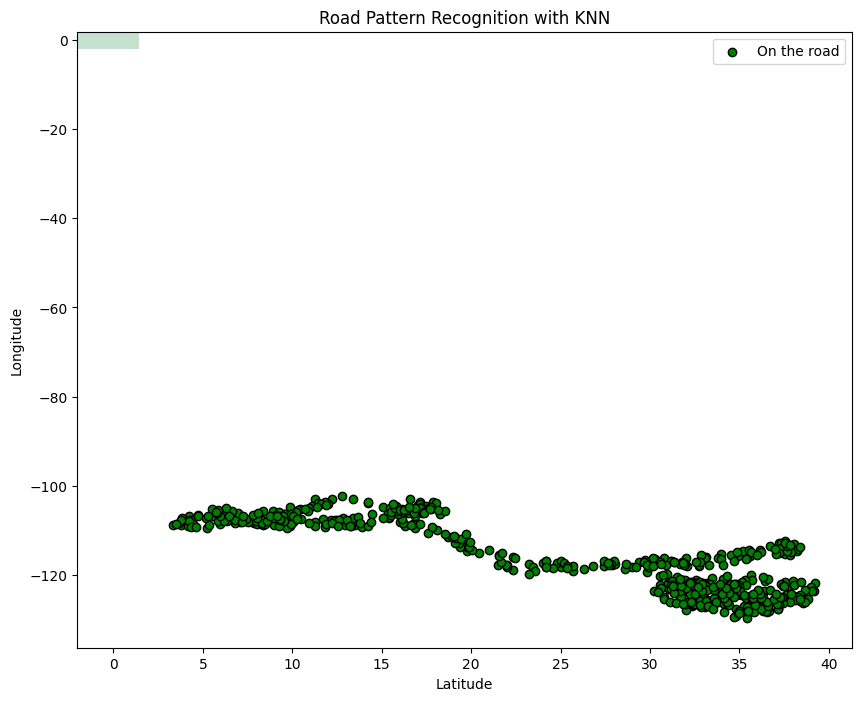

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

road_path = np.array([
    [37.7749, -122.4194],
    [37.5240, -121.5180],
    [37.9880, -121.3207],
    [37.3000, -122.0087],
    [36.4162, -121.2763],
    [36.6184, -120.8602],
    [35.6596, -119.9203],
    [36.3245, -120.4957],
    [35.6881, -121.1289],
    [35.2966, -121.0793],
    [35.1605, -121.4969],
    [35.3842, -122.2179],
    [34.9685, -122.4852],
    [34.8806, -121.9148],
    [34.2800, -121.8864],
    [34.4648, -122.7935],
    [34.6799, -123.4524],
    [33.8100, -122.5546],
    [34.7413, -121.9378],
    [34.3505, -122.7425],
    [34.7189, -122.8622],
    [33.9630, -122.8718],
    [33.0318, -122.0532],
    [32.5494, -121.7282],
    [32.1728, -121.6880],
    [32.2662, -122.3183],
    [33.2054, -121.7680],
    [34.0844, -120.9784],
    [34.2802, -120.1346],
    [33.4572, -120.7427],
    [32.5476, -121.0920],
    [32.3250, -121.5493],
    [32.9824, -121.8358],
    [32.5443, -121.7504],
    [31.8262, -121.1460],
    [30.9753, -120.1722],
    [31.5197, -120.7748],
    [30.5308, -120.1439],
    [30.9445, -119.6859],
    [31.4870, -120.5378],
    [31.2040, -121.3061],
    [31.9302, -121.0595],
    [31.5920, -121.9323],
    [31.2139, -122.2820],
    [31.6732, -122.0069],
    [32.4476, -122.0624],
    [31.6868, -121.6359],
    [32.2083, -121.5134],
    [32.7503, -121.5258],
    [32.7957, -121.6707],
    [31.8466, -122.4549],
    [30.9094, -122.1821],
    [30.5381, -122.1650],
    [31.3533, -122.6664],
    [31.1740, -122.1553],
    [30.6316, -123.0013],
    [30.2111, -123.6789],
    [31.0705, -123.0626],
    [31.3373, -122.3197],
    [31.9447, -122.9466],
    [32.7298, -122.8679],
    [33.3447, -122.0757],
    [32.9807, -122.8556],
    [32.4366, -123.0014],
    [33.0726, -122.2799],
    [32.0865, -122.2584],
    [31.9213, -122.8142],
    [31.1611, -123.1390],
    [32.0469, -123.4926],
    [32.0845, -123.0865],
    [31.8117, -122.1430],
    [32.7366, -122.6394],
    [32.7311, -123.0377],
    [32.3008, -123.9639],
    [32.5199, -123.9585],
    [31.6229, -124.4012],
    [32.4394, -124.9221],
    [31.7292, -124.9432],
    [32.7005, -125.4591],
    [33.0448, -124.9359],
    [32.5200, -124.4794],
    [32.2556, -124.2148],
    [32.5227, -124.1433],
    [31.7032, -123.4727],
    [31.3448, -124.0996],
    [30.4264, -123.9178],
    [30.7815, -124.8847],
    [30.8057, -125.4317],
    [31.0960, -126.0829],
    [31.4779, -126.3095],
    [32.3514, -127.0344],
    [32.0335, -127.8075],
    [32.8829, -127.0528],
    [32.3988, -126.7328],
    [33.0332, -126.6224],
    [33.0925, -127.1387],
    [32.2787, -126.3443],
    [33.0795, -126.0781],
    [32.7576, -126.3797],
    [33.2095, -125.5854],
    [33.9837, -125.0257],
    [34.2678, -125.8574],
    [33.5910, -125.0603],
    [33.8039, -126.0419],
    [33.0068, -125.7149],
    [32.0169, -126.3933],
    [32.1144, -126.0095],
    [32.4183, -126.5610],
    [32.8427, -127.0865],
    [32.4935, -126.5935],
    [32.7927, -125.8950],
    [33.1080, -125.7584],
    [32.2953, -126.0230],
    [31.8257, -126.5350],
    [32.7717, -126.7488],
    [33.5558, -126.4865],
    [34.1455, -126.4813],
    [34.2993, -126.4962],
    [33.6898, -126.0513],
    [33.2513, -127.0027],
    [33.5422, -127.6485],
    [34.4232, -126.7406],
    [35.2529, -127.0003],
    [34.2838, -126.1437],
    [34.1402, -125.2103],
    [35.0674, -124.5043],
    [34.6563, -124.7341],
    [35.3586, -125.1003],
    [34.6976, -124.9867],
    [35.5699, -124.5946],
    [35.7100, -125.4003],
    [35.9400, -124.4202],
    [35.2202, -124.3835],
    [35.9749, -123.9020],
    [36.3690, -123.4970],
    [36.0879, -123.9098],
    [36.7067, -123.2896],
    [37.4408, -122.4631],
    [37.4635, -122.4601],
    [38.0601, -122.1601],
    [38.4640, -121.5686],
    [39.2440, -121.8926],
    [38.9952, -122.7046],
    [39.1518, -123.6327],
    [39.0830, -123.5474],
    [38.6560, -123.3658],
    [37.7170, -124.2911],
    [38.3622, -124.5707],
    [37.6164, -124.5262],
    [38.1563, -125.0946],
    [38.4021, -125.9239],
    [37.5055, -125.8612],
    [37.5868, -125.5863],
    [38.0389, -124.6346],
    [38.0715, -124.9887],
    [38.6619, -125.4470],
    [38.5399, -126.2901],
    [37.5906, -125.3648],
    [38.2625, -124.9729],
    [38.0804, -125.6263],
    [37.3933, -126.1258],
    [37.4918, -125.6966],
    [37.8121, -126.1367],
    [38.7219, -125.6609],
    [38.8306, -125.4375],
    [38.6698, -125.9420],
    [38.3817, -125.4263],
    [37.4105, -126.1942],
    [36.5025, -127.1127],
    [37.2134, -126.7054],
    [37.1618, -127.5097],
    [37.1450, -127.5628],
    [36.4914, -127.6951],
    [36.2884, -127.4634],
    [36.5586, -128.3728],
    [36.3079, -128.1211],
    [36.3141, -127.4081],
    [36.6315, -128.0822],
    [35.7726, -127.7974],
    [34.8257, -127.6258],
    [35.7061, -127.4749],
    [35.4825, -127.1883],
    [35.3990, -127.0971],
    [36.2819, -127.3249],
    [37.2043, -126.5142],
    [36.5959, -127.3754],
    [35.7974, -128.3390],
    [34.9863, -127.9730],
    [34.1287, -128.3350],
    [34.8184, -129.2885],
    [35.4474, -129.7248],
    [34.6837, -129.3313],
    [34.9416, -128.5764],
    [35.4117, -127.9694],
    [34.9758, -128.6145],
    [35.4770, -128.0009],
    [36.4580, -128.1756],
    [36.2021, -127.6228],
    [35.8837, -126.7613],
    [36.6005, -126.9033],
    [37.1023, -126.3942],
    [36.3085, -125.5891],
    [36.3190, -124.9362],
    [35.9591, -124.1451],
    [35.7375, -125.1235],
    [36.5483, -125.9409],
    [36.1869, -125.0408],
    [37.0881, -124.8939],
    [37.3518, -124.9970],
    [36.9382, -125.3397],
    [37.2832, -124.8349],
    [37.8664, -124.2557],
    [37.0488, -124.2668],
    [36.1639, -124.1678],
    [36.0470, -123.3924],
    [35.7488, -124.1582],
    [35.0348, -123.6352],
    [35.2712, -124.4330],
    [34.4395, -124.0310],
    [33.5850, -123.3873],
    [33.9975, -124.2246],
    [33.1671, -123.2513],
    [32.9157, -123.5101],
    [33.5413, -122.6156],
    [34.5133, -122.1088],
    [34.2658, -122.9418],
    [34.8201, -122.8250],
    [34.6685, -122.0123],
    [33.8909, -122.0270],
    [32.9136, -122.0897],
    [32.0263, -122.8521],
    [31.2613, -122.5537],
    [31.7534, -122.3869],
    [32.6777, -122.6372],
    [32.2492, -121.9000],
    [31.6964, -120.9735],
    [30.7207, -120.0338],
    [29.8070, -119.2515],
    [29.8624, -118.2656],
    [29.0100, -118.1579],
    [29.9486, -118.1117],
    [30.2074, -117.7202],
    [30.1165, -117.4650],
    [30.2851, -116.6627],
    [29.3760, -117.1008],
    [30.2768, -116.3203],
    [30.1881, -116.0800],
    [29.7429, -116.7038],
    [29.6703, -116.9971],
    [29.8376, -117.8416],
    [30.7864, -116.8692],
    [31.1827, -116.7970],
    [30.8018, -116.1694],
    [31.1712, -116.8442],
    [31.9931, -116.1991],
    [32.8927, -115.7476],
    [33.1195, -115.9112],
    [33.9850, -115.1790],
    [33.0754, -116.1263],
    [32.8283, -115.5052],
    [33.8029, -116.2044],
    [33.9911, -116.4426],
    [34.9310, -115.7583],
    [35.6076, -115.8209],
    [35.4373, -116.2741],
    [34.5500, -115.5447],
    [35.1758, -114.5453],
    [36.1691, -114.4344],
    [36.7071, -113.5449],
    [37.4064, -114.0502],
    [37.3075, -114.7918],
    [38.2156, -114.5795],
    [37.6728, -114.2361],
    [37.9091, -114.5198],
    [37.1362, -114.1766],
    [37.1768, -113.6320],
    [37.2172, -112.9276],
    [37.3210, -112.8057],
    [38.0743, -112.9988],
    [37.3423, -113.9412],
    [37.8526, -113.7006],
    [38.2607, -114.2747],
    [37.5335, -115.2456],
    [37.2347, -115.0657],
    [37.0191, -115.1908],
    [37.8275, -115.4943],
    [37.8554, -114.9270],
    [37.6485, -114.6828],
    [38.3733, -113.7838],
    [37.6674, -112.9306],
    [37.6516, -113.4141],
    [37.5699, -112.4540],
    [37.5551, -112.7965],
    [37.8219, -113.3162],
    [36.9737, -114.0585],
    [36.2298, -114.7547],
    [35.5074, -114.4729],
    [34.8712, -114.7816],
    [35.6648, -114.8337],
    [35.9999, -115.4890],
    [35.3845, -116.4073],
    [34.7223, -116.8501],
    [34.0763, -117.6727],
    [33.3176, -117.7511],
    [32.7303, -118.0226],
    [32.7371, -117.6418],
    [31.8157, -117.0430],
    [32.0715, -117.8795],
    [32.8187, -117.0377],
    [31.9409, -117.4840],
    [32.5533, -116.9875],
    [31.9223, -117.5688],
    [31.6632, -117.5997],
    [31.8998, -117.8619],
    [31.8248, -117.3669],
    [30.8982, -117.8621],
    [31.3249, -117.0717],
    [31.3482, -117.0074],
    [30.5626, -117.1126],
    [30.6278, -117.6277],
    [30.1663, -117.8731],
    [29.2064, -118.2289],
    [28.6293, -118.5739],
    [27.8689, -117.7929],
    [28.0561, -117.4347],
    [28.6344, -117.4378],
    [27.8082, -117.3636],
    [27.9819, -116.8727],
    [27.8452, -117.6175],
    [27.4128, -117.8914],
    [27.7046, -117.7498],
    [27.4168, -116.7768],
    [27.6284, -117.3023],
    [26.8319, -117.9966],
    [26.3238, -118.6753],
    [25.6970, -119.1051],
    [25.0437, -118.3115],
    [24.2042, -118.2625],
    [24.0250, -117.2978],
    [23.2491, -117.5020],
    [24.1880, -116.7710],
    [24.8222, -117.2552],
    [24.1639, -116.9179],
    [25.0227, -116.8044],
    [25.1659, -117.2445],
    [25.7049, -117.8704],
    [25.3523, -118.0195],
    [25.3675, -118.5347],
    [24.5971, -118.3134],
    [24.1744, -118.1510],
    [23.4831, -118.1887],
    [23.5483, -119.0850],
    [23.2215, -119.8162],
    [22.3483, -118.8363],
    [21.9930, -118.2165],
    [21.5023, -117.8535],
    [22.0227, -117.6623],
    [21.9659, -117.8386],
    [21.6636, -116.9795],
    [22.3248, -116.0495],
    [21.5734, -115.5877],
    [22.4501, -116.2253],
    [21.5831, -115.7430],
    [21.7321, -115.0594],
    [21.0116, -114.4688],
    [20.4149, -115.1415],
    [19.7434, -114.5124],
    [20.0738, -114.4662],
    [19.7914, -113.7118],
    [19.5763, -113.0786],
    [19.4546, -113.3247],
    [19.3800, -113.7220],
    [19.8752, -113.7165],
    [19.3396, -112.9174],
    [19.1074, -112.8303],
    [19.9203, -112.5818],
    [19.1541, -111.7022],
    [19.4095, -112.0323],
    [18.6881, -111.4443],
    [18.9282, -111.3774],
    [19.7160, -110.8002],
    [19.0194, -111.1767],
    [18.5163, -110.6888],
    [17.5834, -110.5491],
    [18.1083, -109.7955],
    [17.7925, -109.1530],
    [17.0138, -108.4601],
    [16.2687, -108.6655],
    [16.8633, -109.3657],
    [16.3218, -108.9212],
    [16.7619, -108.6389],
    [17.1498, -108.5534],
    [16.6534, -108.8621],
    [16.0166, -108.0452],
    [16.1834, -108.2435],
    [16.1074, -107.3489],
    [15.4141, -107.1764],
    [15.4259, -106.9535],
    [14.4621, -106.2093],
    [15.3263, -106.0790],
    [15.7196, -105.2340],
    [16.1341, -105.9289],
    [16.2867, -105.7155],
    [16.1349, -105.2426],
    [17.0037, -104.3915],
    [16.9054, -105.1650],
    [17.8750, -104.4872],
    [17.1244, -103.6455],
    [17.8642, -103.6078],
    [18.0467, -103.8098],
    [17.1562, -104.1394],
    [17.7619, -105.1302],
    [17.4289, -105.3338],
    [17.5037, -104.4941],
    [17.1964, -104.8002],
    [17.6714, -104.8958],
    [17.1206, -104.9909],
    [16.4023, -105.6381],
    [16.3991, -105.8003],
    [17.2288, -106.0755],
    [17.3899, -105.8110],
    [16.4161, -105.4839],
    [15.7722, -104.5617],
    [15.0695, -104.7325],
    [14.2402, -103.7388],
    [14.2446, -103.5480],
    [13.3788, -103.0481],
    [12.7986, -102.2520],
    [12.2089, -102.8706],
    [11.2820, -102.9264],
    [11.4116, -103.7950],
    [11.9627, -103.8884],
    [12.0115, -104.0069],
    [11.8130, -103.8876],
    [11.1235, -104.5238],
    [11.8471, -103.6316],
    [11.5937, -104.0901],
    [11.8817, -104.2726],
    [10.9325, -104.9603],
    [11.3644, -104.6424],
    [10.4186, -105.1985],
    [9.8807, -104.8547],
    [8.9202, -105.6465],
    [9.5200, -106.2894],
    [9.8255, -106.8130],
    [9.0244, -107.3267],
    [9.4689, -106.6153],
    [10.1293, -106.8209],
    [10.4655, -107.4110],
    [10.0518, -106.6183],
    [9.0778, -107.4473],
    [8.4936, -108.3942],
    [7.8565, -108.2281],
    [7.6993, -107.4428],
    [8.3342, -107.7592],
    [7.8530, -107.9998],
    [8.0336, -108.4636],
    [8.2819, -108.6448],
    [8.3860, -108.7726],
    [7.9749, -107.8757],
    [8.5022, -108.5954],
    [9.2391, -108.6206],
    [10.0282, -108.0209],
    [9.8786, -108.9759],
    [9.4160, -108.8927],
    [9.6829, -109.3769],
    [8.9617, -108.7070],
    [9.9305, -108.6556],
    [9.2738, -109.1110],
    [8.3106, -108.2824],
    [7.5461, -108.1294],
    [7.0942, -108.0210],
    [7.3970, -107.3616],
    [6.8099, -108.3396],
    [6.0837, -107.5395],
    [6.8314, -107.3447],
    [7.0325, -107.0146],
    [6.3832, -106.1858],
    [6.2208, -106.4195],
    [6.2586, -107.3256],
    [5.5912, -106.8495],
    [4.7568, -106.6432],
    [4.2475, -106.8646],
    [3.8248, -107.1533],
    [4.2629, -107.5590],
    [4.3957, -107.6069],
    [4.7231, -106.7333],
    [5.1882, -107.3034],
    [4.2506, -107.7789],
    [4.4408, -108.6760],
    [4.4335, -108.4823],
    [4.1020, -107.9405],
    [3.3152, -108.7902],
    [3.7715, -108.7992],
    [4.1484, -108.9296],
    [3.6412, -108.2914],
    [4.2400, -107.9020],
    [3.7843, -107.7215],
    [3.5062, -108.5384],
    [4.3409, -109.2647],
    [5.2413, -109.3727],
    [4.6116, -109.2889],
    [5.3575, -108.8245],
    [5.9706, -108.5069],
    [6.3552, -107.8085],
    [5.8545, -107.8297],
    [5.2969, -106.8543],
    [6.1850, -107.7755],
    [6.5962, -106.9250],
    [5.9573, -106.7891],
    [6.7883, -107.7212],
    [7.1832, -108.1265],
    [8.0319, -107.1844],
    [8.9205, -107.2360],
    [9.6446, -106.5469],
    [9.2828, -105.8890],
    [8.3568, -105.6965],
    [7.8168, -106.4553],
    [6.9707, -106.0628],
    [6.6505, -105.6132],
    [5.7812, -105.9827],
    [5.8602, -105.4012],
    [5.4977, -105.1494],
    [6.2696, -104.9177],
    [5.7355, -105.8689],
    [6.4757, -106.8264],
    [7.2251, -106.7685],
    [8.1033, -106.1709],
    [9.0991, -106.4695],
    [9.6335, -106.6656],
    [9.5933, -106.4106],
    [10.3406, -105.4425],
    [10.8772, -105.6069],
    [10.7199, -105.1318],
    [10.1974, -105.9108],
    [9.9067, -106.3363],
    [9.4993, -106.8691],
    [8.5835, -107.8334],
    [9.5589, -107.9778],
    [9.3276, -107.6185],
    [8.7641, -106.7186],
    [9.3368, -107.5398],
    [9.1719, -106.7815],
    [10.0614, -106.8467],
    [10.2882, -107.5127],
    [11.2706, -108.0493],
    [12.1560, -107.7500],
    [12.3715, -107.7247],
    [11.8328, -108.3716],
    [11.2738, -108.9987],
    [11.8330, -109.2985],
    [10.9487, -108.3603],
    [11.7162, -107.5048],
    [12.7061, -108.1570],
    [12.4985, -107.6405],
    [12.8906, -108.3327],
    [13.5222, -108.8838],
    [12.9699, -108.8099],
    [13.1558, -108.6497],
    [12.3387, -107.8948],
    [11.8699, -108.6358],
    [12.6474, -107.7245],
    [13.3717, -107.1054],
    [13.6822, -107.0037],
    [12.8561, -107.1868],
    [12.6015, -107.6673],
    [13.0484, -107.6755],
    [12.2105, -108.2352],
    [12.5770, -109.0829],
    [13.2794, -109.0926],
    [13.2406, -108.9078],
    [13.8899, -109.2122],
    [14.2459, -109.0807],
    [13.7800, -108.3235],
    [14.3749, -108.0066],
    [15.0760, -107.2720],
    [15.4927, -106.5979],
    [15.8877, -106.2377],
    [16.1249, -105.7322],
    [15.4421, -104.9705],
    [16.1858, -105.9120],
    [16.8374, -106.6543],
    [16.5077, -106.1672],
    [15.8292, -105.5313],
    [16.4935, -105.5164],
    [15.5062, -105.9423],
    [15.7401, -104.9799],
    [16.0037, -105.4603],
    [16.2717, -105.3803],
    [16.8314, -106.1664],
    [17.3535, -106.0838],
    [18.2795, -106.4001],
    [18.5447, -105.5360],
    [17.7497, -104.6616],
    [18.1255, -105.5259],
    [17.7274, -105.1096],
    [16.8621, -104.9452],
    [16.5539, -104.7034],
    [15.6454, -103.9603],
    [16.5924, -103.0226],
])



X = np.vstack([road_path])


y = np.array([1] * len(road_path))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_scaled, y)


x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))


plt.contourf(xx, yy, Z, alpha=0.3, cmap='summer')


plt.scatter(road_path[:, 0], road_path[:, 1], c='green', label='On the road', edgecolors='black')


plt.title("Road Pattern Recognition with KNN")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(loc="best")
plt.show()
